# Problem Statement:


## Create a machine learning model which will help the company in determining the salary of newly hired employees 
 

### import statements for various libraries in Python.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pydotplus
from IPython.display import Image
import numpy as np
import seaborn as sns
import statsmodels.api as sn
import pandas as pd
import matplotlib.pyplot as plt

### Data import in python 

In [2]:
df = pd.read_csv('C:/Users/TEJAS/Desktop/python exc/Salary.csv', header = 0)

In [3]:
df.head()

,College,City,Role,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_Month,CTC
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10


In [4]:
df.shape

(1589, 8)

### Data processing 

In [5]:
df.describe()

,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_Month,CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [6]:
College = pd.read_csv('C:/Users/TEJAS/Desktop/python exc/Colleges.csv', header = 0)

In [7]:
College.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [8]:
Tier1=College["Tier 1"].tolist()
Tier2=College["Tier 2"].tolist()
Tier3=College["Tier 3"].tolist()

In [9]:
for item in df['College']:
    if item in Tier1:
        df['College'].replace(item, 1, inplace=True)
    elif item in Tier2:
        df['College'].replace(item, 2, inplace=True)
    elif item in Tier3:
        df['College'].replace(item, 3, inplace=True)

             

In [10]:
cities = pd.read_csv('C:/Users/TEJAS/Desktop/python exc/cities.csv', header = 0)

In [11]:
cities.head()

,Metrio_City,non_metro_cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [12]:
Metrio_City=cities["Metrio_City"].tolist()
non_metro_cities=cities["non_metro_cities"].tolist()

In [13]:
for item in df['City']:
    if item in Metrio_City:
        df['City'].replace(item, 1, inplace=True)
    elif item in non_metro_cities:
        df['City'].replace(item, 0, inplace=True)

In [14]:
df.head(10)

,College,City,Role,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_Month,CTC
0,2,0,Manager,55523,3,66,19,71406.58
1,2,0,Executive,57081,1,84,18,68005.87
2,3,0,Executive,60347,2,52,28,76764.02
3,3,0,Executive,49010,2,81,33,82092.39
4,1,0,Executive,57879,4,74,32,73878.10
5,2,0,Executive,54340,4,73,31,59950.89
6,3,1,Executive,60298,1,42,46,66602.34
7,2,1,Executive,49944,2,56,37,57768.44
8,3,1,Executive,53124,4,40,37,70083.30
9,1,0,Executive,51141,1,47,60,85648.48


In [15]:
df.shape

(1589, 8)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Role                 1589 non-null   object 
 3   Previous_CTC         1589 non-null   int64  
 4   Previous_job_change  1589 non-null   int64  
 5   Graduation_Marks     1589 non-null   int64  
 6   EXP_Month            1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(1), int64(6), object(1)
memory usage: 99.4+ KB


In [17]:
df = pd.get_dummies(df,columns = ["Role"],drop_first = True)

In [18]:
df["Role_Manager"] = df["Role_Manager"].astype(int)

In [19]:
df.head(10)

,College,City,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_Month,CTC,Role_Manager
0,2,0,55523,3,66,19,71406.58,1
1,2,0,57081,1,84,18,68005.87,0
2,3,0,60347,2,52,28,76764.02,0
3,3,0,49010,2,81,33,82092.39,0
4,1,0,57879,4,74,32,73878.10,0
5,2,0,54340,4,73,31,59950.89,0
6,3,1,60298,1,42,46,66602.34,0
7,2,1,49944,2,56,37,57768.44,0
8,3,1,53124,4,40,37,70083.30,0
9,1,0,51141,1,47,60,85648.48,0


Imputation:
Missing values in the DataFrame (df) are replaced with the mean using the SimpleImputer with a strategy of 'mean'.

In [20]:
imputer = SimpleImputer(strategy='mean')

In [21]:
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

Outlier Removal:
Outliers in the 'CTC' column are identified and removed based on the interquartile range (IQR). 
Values outside the range defined by 1.5 times the IQR below the first quartile (lower_bound) and 1.5 times 
the IQR above the third quartile (upper_bound) are excluded from the DataFrame.

In [22]:
Q1 = df['CTC'].quantile(0.25)
Q3 = df['CTC'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [23]:
df = df[(df['CTC'] >= lower_bound) & (df['CTC'] <= upper_bound)]

### Perform test train splitting over X and Y data

In [24]:
X_multi = df.drop('CTC', axis=1)

In [25]:
y_multi = df['CTC']

In [26]:
X_multi.head()

,College,City,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_Month,Role_Manager
0,2.0,0.0,55523.0,3.0,66.0,19.0,1.0
1,2.0,0.0,57081.0,1.0,84.0,18.0,0.0
2,3.0,0.0,60347.0,2.0,52.0,28.0,0.0
3,3.0,0.0,49010.0,2.0,81.0,33.0,0.0
4,1.0,0.0,57879.0,4.0,74.0,32.0,0.0


In [27]:
X_multi.shape

(1495, 7)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

In [29]:
feature_names = X_train.columns.tolist()

### Use RandomForestRegressor Model

Random Forests offer many advantages, the choice of the model depends on the specific characteristics of the dataset and the goals of the analysis. It's often a good idea to experiment with different models to find the one that performs best for a particular task.

In [30]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
y_pred = model.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, y_pred)

In [33]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 54765106.246183224


### Saving The model 

Saving the Model:
The pickle module is used to serialize and save a machine learning model to a file named "CTC.pkl" in binary write mode (wb). This allows you to persist the trained model for later use.

In [37]:
import pickle

file = open("CTC.pkl","wb")
pickle.dump(model,file)
file.close()

Loading the Model:
The saved model is then loaded back into a variable (clf) using the pickle module and the file is closed.

In [38]:
import pickle
file = open("CTC.pkl","rb")
clf = pickle.load(file)
file.close()

### Prediction CTC 

User Input for Prediction:
The user is prompted to enter values for various features that the model requires

In [40]:
EXP_Month = int(input("Enter Month Of Experience: "))
College = int(input("Enter College: "))
City = int(input("Enter City: "))
Previous_CTC = int(input("Enter Previous CTC: "))
Previous_job_change = int(input("Enter Previous job change: "))
Graduation_Marks = int(input("Enter Graduation Marks: "))
Role_Manager = int(input("Enter Role_Manager: "))
input_features = [
    [College, City, Previous_CTC, Previous_job_change, Graduation_Marks, EXP_Month, Role_Manager,]
]
salary_pred = clf.predict(input_features)
print ("CTC :")
print (salary_pred)

Enter Month Of Experience: 52
Enter College: 3
Enter City: 1
Enter Previous CTC: 88552
Enter Previous job change: 4
Enter Graduation Marks: 85
Enter Role_Manager: 1
CTC :
[94055.1827]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## single Logistic Regression  

In [41]:
x = sn.add_constant(df['EXP_Month'])

In [42]:
x.head()

,const,EXP_Month
0,1.0,19.0
1,1.0,18.0
2,1.0,28.0
3,1.0,33.0
4,1.0,32.0


In [43]:
lm = sn.OLS(df['EXP_Month'],x).fit()

In [44]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              EXP_Month   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.171e+33
Date:                Sun, 03 Dec 2023   Prob (F-statistic):               0.00
Time:                        19:42:41   Log-Likelihood:                 46736.
No. Observations:                1495   AIC:                        -9.347e+04
Df Residuals:                    1493   BIC:                        -9.346e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.643e-14   4.85e-16     33.853      0.000    1.55e-14    1.74e-14
EXP_Month      1.0000   1.18e-17   8.47e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                      221.160   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.451
Skew:                           0.364   Prob(JB):                     1.25e-18
Kurtosis:                       2.109   Cond. No.                         120.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple Logistic Regression 

In [45]:
X_multi_cons = sn.add_constant(X_multi)

In [46]:
X_multi_cons.head()

,const,College,City,Previous_CTC,Previous_job_change,Graduation_Marks,EXP_Month,Role_Manager
0,1.0,2.0,0.0,55523.0,3.0,66.0,19.0,1.0
1,1.0,2.0,0.0,57081.0,1.0,84.0,18.0,0.0
2,1.0,3.0,0.0,60347.0,2.0,52.0,28.0,0.0
3,1.0,3.0,0.0,49010.0,2.0,81.0,33.0,0.0
4,1.0,1.0,0.0,57879.0,4.0,74.0,32.0,0.0


In [47]:
lm_multi = sn.OLS(y_multi, X_multi_cons).fit()

In [48]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     132.6
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          1.00e-151
Time:                        19:42:44   Log-Likelihood:                -15495.
No. Observations:                1495   AIC:                         3.101e+04
Df Residuals:                    1487   BIC:                         3.105e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.687e+04   2034.179     23.043      0.000    4.29e+04    5.09e+04
College              -270.0263    237.614     -1.136      0.256    -736.120     196.068
City                  102.5467    399.453      0.257      0.797    -681.005     886.098
Previous_CTC            0.2759      0.031      9.034      0.000       0.216       0.336
Previous_job_change    65.6996    178.427      0.368      0.713    -284.295     415.694
Graduation_Marks        3.9262     13.326      0.295      0.768     -22.213      30.066
EXP_Month             234.2397     14.318     16.359      0.000     206.153     262.326
Role_Manager         1.416e+04    551.163     25.693      0.000    1.31e+04    1.52e+04
==============================================================================
Omnibus:                       49.273   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.340
Skew:                           0.452   Prob(JB):                     2.61e-12
Kurtosis:                       3.194   Cond. No.                     5.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Visualization

Create a joint plot using Seaborn, visually representing the relationship between the 'CTC' and 'EXP_Month' columns in the DataFrame 

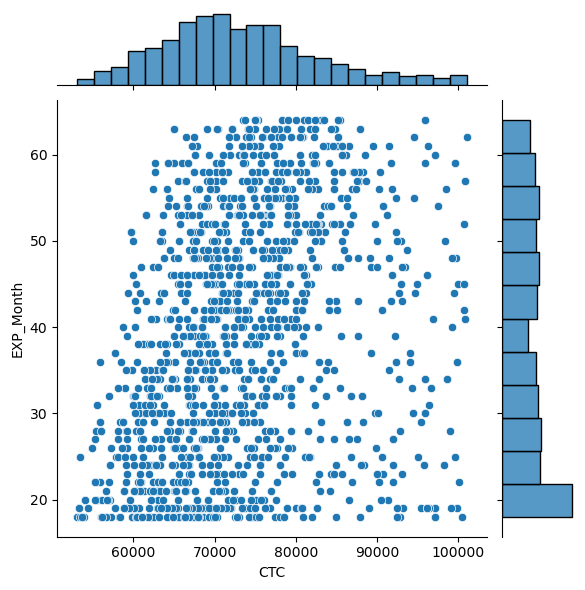

In [49]:
sns.jointplot(x='CTC' , y= 'EXP_Month', data = df)

Create a Seaborn joint plot with a regression line. This plot visualizes the relationship between 'CTC' and 'EXP_Month' from the DataFrame

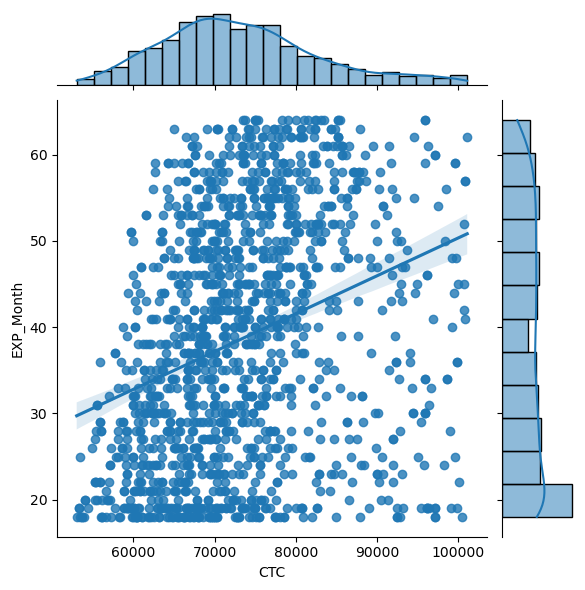

In [50]:
sns.jointplot(x = df['CTC'], y= df['EXP_Month'], data=df, kind = 'reg')

this code visually represents the distribution of college tiers in the 'College' column using a count plot, with numerical values mapped to meaningful labels for better interpretation. The resulting plot provides a clear overview of the count of each college tier in the dataset.

In [51]:
college_mapping = {1.0: 'Tier1', 2.0: 'Tier2', 3.0: 'Tier3'}
df['College'] = df['College'].map(college_mapping)

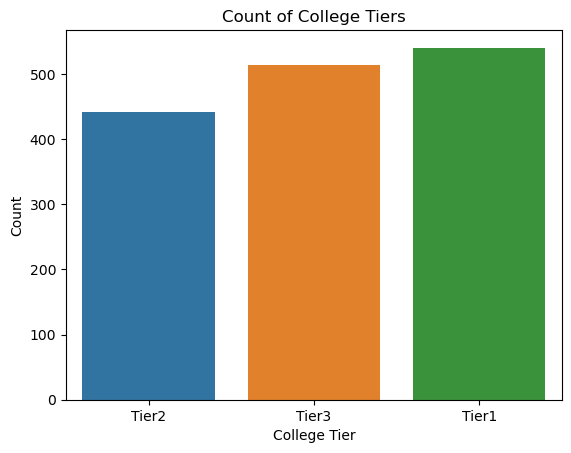

In [52]:
sns.countplot(x="College", data=df)
plt.xlabel('College Tier')
plt.ylabel('Count')
plt.title('Count of College Tiers')
plt.show()

this code visually represents the distribution of city types ('Metro_City' and 'Non_Metro_City') in the 'City' column using a count plot. The mapping of numerical values to descriptive labels enhances the interpretability of the plot, providing an overview of the count of each city type in the dataset.

In [53]:
city_mapping = {0: 'Non_Metro_City', 1: 'Metro_City'}
df['City'] = df['City'].map(city_mapping)

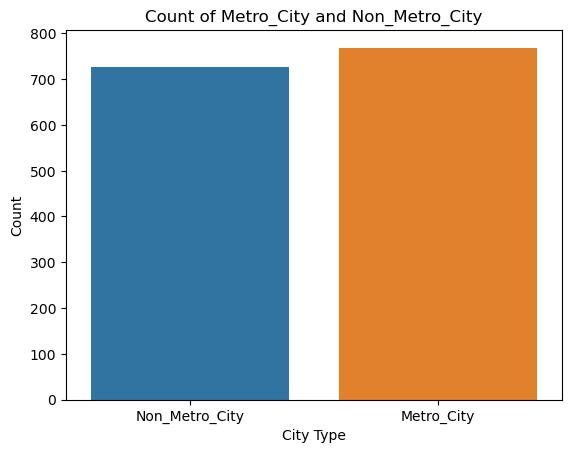

In [54]:
sns.countplot(x="City", data=df)
plt.xlabel('City Type')
plt.ylabel('Count')
plt.title('Count of Metro_City and Non_Metro_City')
plt.show()

## Plot decision tree 

A decision tree regression model (regtree) is created with a maximum depth of 3 using the training data (X_train and y_train). The model is designed to predict continuous values, and its complexity is limited by the specified maximum depth, 

In [55]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [56]:
regtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

A decision tree (regtree) is visualized using Graphviz and Pydotplus. The tree structure is exported to Graphviz format (dot_data), converted into a graph (graph), and then displayed as an image using Pydotplus and the Image module.

In [58]:
dot_data = tree.export_graphviz(regtree, out_file = None, feature_names= X_train.columns,filled = True)

In [59]:
graph = pydotplus.graph_from_dot_data(dot_data)

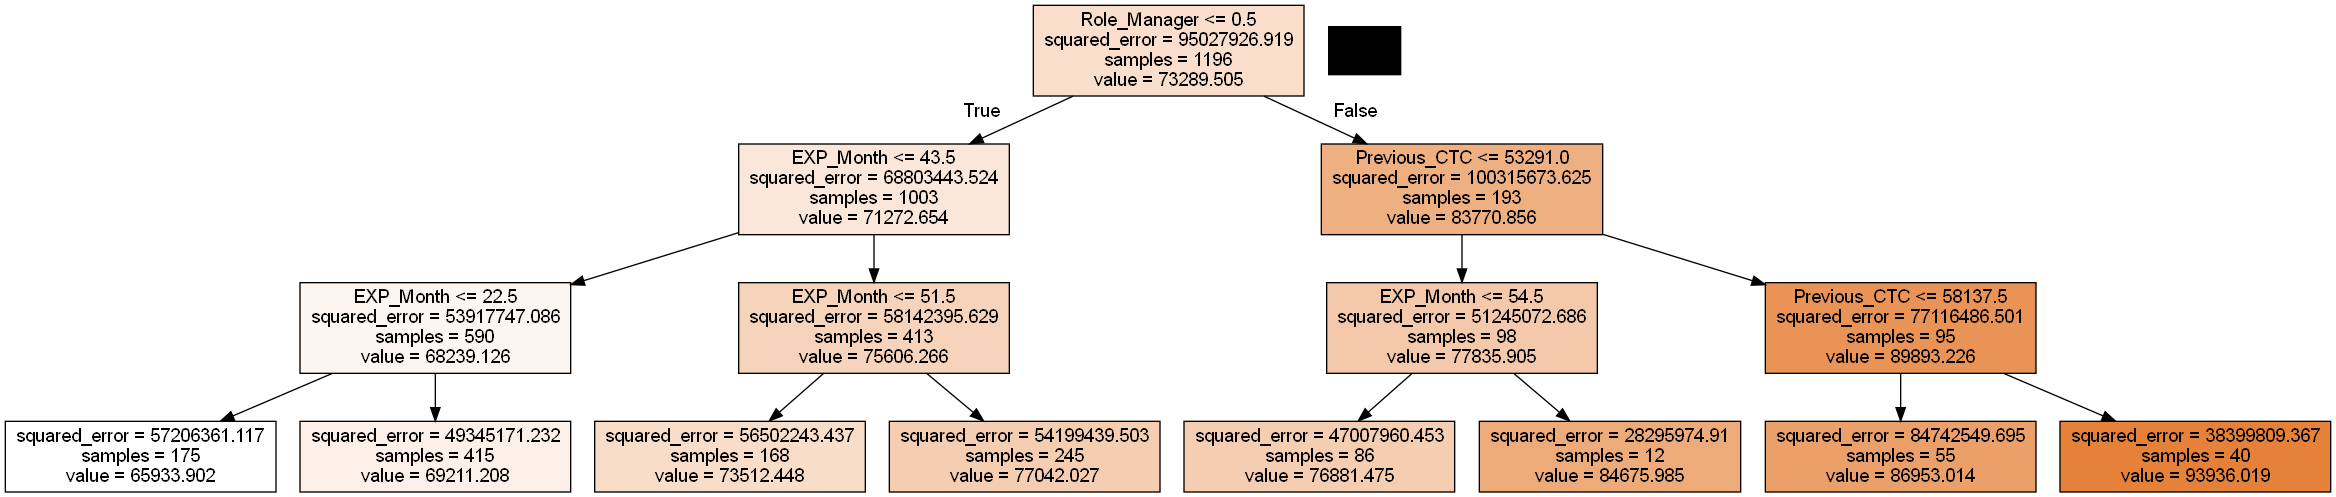

In [60]:
Image(graph.create_png())

# Questions

###  Q1. Your views about the problem statement?


Ans :- 

The problem statement involves predicting the salary of newly hired employees at TechWorks Consulting using machine learning. Here are my views on the problem statement:

(1) Data Preparation :-

Changing the college field into a numerical data type with the help of the tier of that college: This involves encoding the college tier information into numerical values. You can use techniques like label encoding or one-hot encoding.
Similar treatment for the city field: Encode city information into numerical values using label encoding or one-hot encoding.
Creating dummy variables for "Role_Manager": This involves one-hot encoding the "Role_Manager" variable to create binary (dummy) variables for each category.


(2) Handling Outliers and Missing Values :-

Identify and handle outliers: Use statistical methods or visualization techniques to identify outliers and decide whether to remove or transform them.


(3) Missing values :-

Impute missing values using appropriate strategies, such as mean, median, or most frequent values for numerical features and mode for categorical features.


(4) Building Predictive Model :-

Choose a regression model: The code I provided earlier uses a RandomForestRegressor. RandomForest is a versatile model that can handle both numerical and categorical features, and it often performs well in various scenarios.
Split the data into training and testing sets: This ensures that the model's performance is evaluated on unseen data.
Train the model: Fit the chosen regression model on the training data.
Make predictions: Use the trained model to predict salaries on the test set.
Evaluate the model: Assess the model's performance using metrics like Mean Squared Error (MSE).


(5) Improving Accuracy :-

Experiment with different regression models: Try other regression models like Linear Regression, Gradient Boosting, or Support Vector Regression to see if they provide better accuracy.


Overall, the problem involves a typical regression task where the goal is to predict a continuous target variable (salary) based on various features. The provided code snippet offers a starting point, and you can further customize it based on the specific characteristics of your dataset and the performance of the model.

###  Q2. What will be your approach to solving this task?


Answer :-

(1) Data Exploration :-

Understand the structure of the dataset.
Explore summary statistics, distributions, and visualizations to identify patterns and insights.
Check for any obvious outliers or anomalies in the data.


(2) Data Cleaning :-

Handle missing values by imputing or removing them based on the nature and extent of missingness.
Address outliers appropriately, either by removing them or transforming the data.
Convert categorical variables into a suitable format for modeling.


(3) Feature Engineering :-

Create dummy variables for the "Role_Manager" column to handle categorical data.
Explore potential new features that might be relevant to salary prediction


(4) Data Splitting :-

Split the data into training and testing sets. This helps in evaluating the model on unseen data.


(5) Model Selection :-

Choose an initial regression model (e.g. RandomForestRegressor) as a baseline.
Train the model using the training dataset.


(6) Model Evaluation :-

Evaluate the model's performance on the testing dataset using appropriate metrics (e.g., Mean Squared Error).
Analyze the residuals to understand where the model may be making errors.

### Q3. What were the available ML model options you had to perform this task? 

Answer :-

For predicting salary, I have a variety of machine learning models to choose from. Here are some commonly used regression models that could be considered for this task:


(1) Linear Regression :-

Simple and interpretable.
Assumes a linear relationship between features and the target variable.


(2) Random Forest Regressor :-

Handles non-linearity well.
Can capture complex relationships in the data.
Robust to overfitting.


(3) Decision Tree Regression :-

Decision Tree Regression is a supervised learning algorithm used for regression tasks. It works by recursively splitting the dataset into subsets based on the features that provide the best split, optimizing for reduced variance in the target variable. 


### Q4. Which model’s performance is best and what could be the possible reason for that?



Answer :-
    
The Random Forest Regressor has been identified as the best-performing model. 
Here are some possible reasons for its superior performance



(1) Handling Non-Linearity :-

Random Forests can capture non-linear relationships and complex interactions between features, which might be present in the data.



(2) Ensemble Learning :-

Random Forest is an ensemble model that combines multiple decision trees. This helps to reduce overfitting and increase generalization to new, unseen data.



(3) Robustness to Outliers :-

Random Forests are less sensitive to outliers compared to some other models. This is beneficial when dealing with real-world datasets that might contain noisy or extreme values.



(4) Feature Importance :-

Random Forest provides a feature importance measure, helping to identify the most influential features in predicting the target variable (CTC). 
This can be valuable for understanding the factors that contribute to CTC predictions.



(5) Hyperparameter Tuning :-

Random Forests offer several hyperparameters that can be tuned for better performance. Proper tuning may have been performed to optimize the model's accuracy.



(6) Handling Missing Values :-

Random Forests can handle missing values well, which is important in real-world datasets where some entries might be incomplete.

###  Q5. What steps can you take to improve this selected model’s performance even further?


Answer :-

To further improve the performance of your Random Forest Regression model, I can consider the following steps:


(1) Feature Engineering :-  Explore different ways to engineer features. This may involve creating interaction terms, polynomial features, or transforming existing features to better capture relationships in the data.


(2) Handling Imbalanced Data :-  If the dataset is imbalanced, where certain classes or ranges of the target variable are underrepresented, you may need to address this imbalance. Techniques include oversampling, undersampling, or using algorithms that handle imbalanced data well.


(3) Feature Importance :-  Regularly assess and interpret feature importance to identify key variables influencing predictions. This can guide further feature selection or engineering efforts.


(4) Data Quality :-  Ensure the data is clean and free from errors. Address missing values, outliers, or inconsistencies that could adversely affect the model's performance.


(5) Advanced Techniques :-  Investigate more advanced techniques such as gradient boosting or stacking, which involve combining predictions from multiple models.


(6) Evaluate Residuals :-  Analyze the residuals (the differences between predicted and actual values) to identify patterns or areas where the model performs poorly. This can guide further model refinement.